# Data Mining (Δ02): Exercise Set 2: 2.2 - 5Gaussians Dataset 

<br>Name: Nefeli Eleftheria Sextou</br> 
<br> Student ID: 503</br> 
<br> E-mail: pcs00503@uoi.gr, nsekstou@cs.uoi.gr</br>

In [1]:
#general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data preprocessing


#classifiers
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

#to ignore warnings 
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
data = []
# read the file line by line
with open(r'C:\Users\Nefeli\Desktop\dm_msc\DM_Homework2_2024\clustering\5Gaussians.txt', 'r') as file:
    for line in file:
        # Strip whitespace, split (by space)
        clean_line = line.strip().split()
        data.append((float(clean_line[0]), float(clean_line[1])))

# Create DataFrame from the list
main_df = pd.DataFrame(data, columns=['x', 'y'])
#rings3

### Plot data

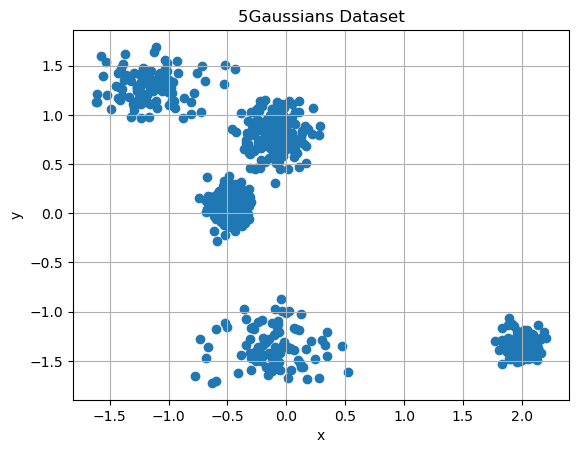

In [3]:
plt.scatter(main_df['x'], main_df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('5Gaussians Dataset')
plt.grid(True)
plt.show()

<b>Expected number of clusters: 5</b>

## k-means

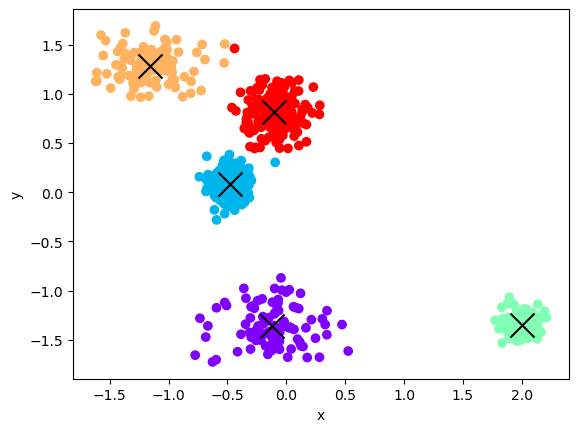

In [4]:
#init and fit
kmeans = KMeans(n_clusters=5)
kmeans.fit(main_df)

# get centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Agglomerative Clustering : single link

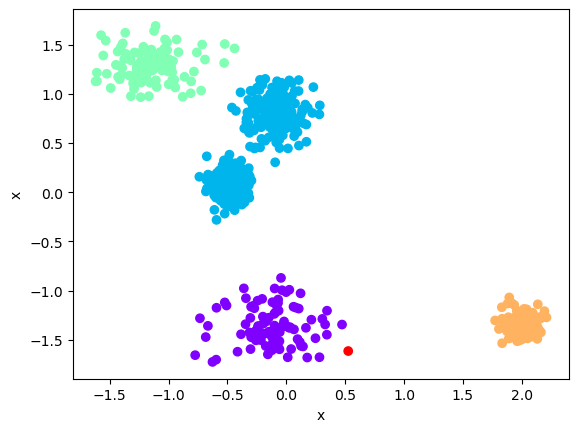

In [5]:
#init and fit
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='single')

#get labels
labels = agg_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('x')
plt.show()


## Agglomerative Clustering : average link

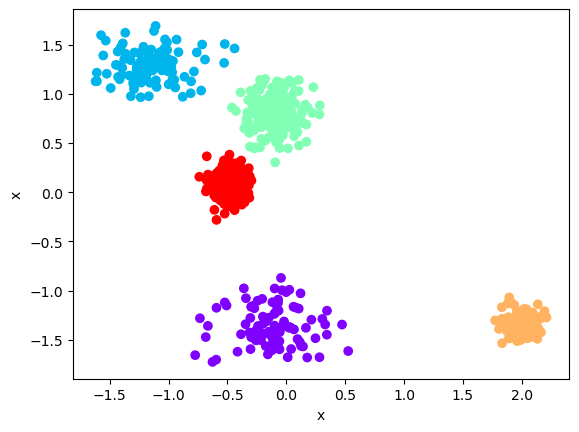

In [6]:
#init and fit
agg_cluster = AgglomerativeClustering(n_clusters=5, linkage='average')

#get labels
labels = agg_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('x')
plt.show()

## Spectral Clustering 

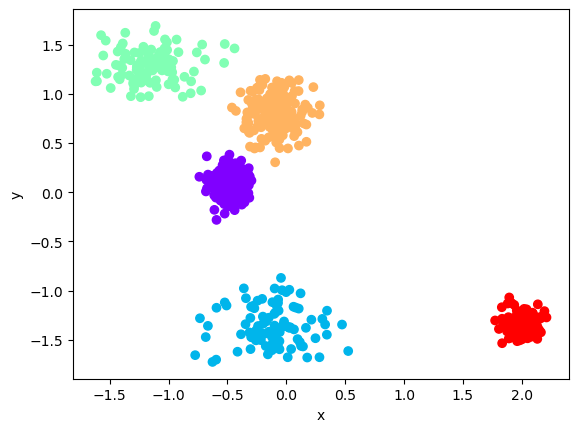

In [8]:
# perform spectral clustering
sigma = 0.1 # tried 0.1, 0.5, 1
spectral_cluster = SpectralClustering(n_clusters=5, affinity='rbf', gamma = (1/(sigma**2)), assign_labels='kmeans')
labels = spectral_cluster.fit_predict(main_df)

plt.scatter(main_df['x'], main_df['y'], c=labels, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Remarks 

K-means, Average Link Agglomerative Clustering and Spectral Clustering for <i>sigma=0.1</i> achieve the expected clustering. Agglomerative Clustering with a Single Link setting fails.

The first three classifiers succeed due to the data having desirable properties of similar shape, density, and variability, making the clusters well-separable, except for two clusters in the middle that are closer together.

Single Link Agglomerative Clustering fails due to the "chaining effect." This effect occurs because this method merges clusters based on the minimum distance between any two points in the clusters. In closely spaced points, this can result in long, chain-like clusters. In this dataset, the two middle clusters are incorrectly merged into one, and a single red point appears because the classifier attempts to "find" five clusters despite the chaining effect.